# Linear Regression

Linear regression is used for finding linear relationship between target and one or more predictors. There are two types of linear regression- Simple and Multiple. The core idea is to obtain a line that best fits the data. The best fit line is the one for which total prediction error (all data points) are as small as possible. Error is the distance between the point to the regression line.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import io

Load the dataset

Attribute Information:

1. mpg:           continuous
2. cylinders:     multi-valued discrete
3. displacement:  continuous
4. horsepower:    continuous
5. weight:        continuous
6. acceleration:  continuous
7. model year:    multi-valued discrete
8. origin:        multi-valued discrete
9. car name:      string (unique for each instance)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving auto-mpg.csv to auto-mpg.csv


In [ ]:
data = pd.read_csv(io.StringIO(uploaded['auto-mpg.csv'].decode('utf-8')))

In [ ]:
print(data.head())

    mpg  cyl  displ   hp  weight  accel  yr  origin                       name
0  18.0    8  307.0  130    3504   12.0  70       1  chevrolet chevelle malibu
1  15.0    8  350.0  165    3693   11.5  70       1          buick skylark 320
2  18.0    8  318.0  150    3436   11.0  70       1         plymouth satellite
3  16.0    8  304.0  150    3433   12.0  70       1              amc rebel sst
4  17.0    8  302.0  140    3449   10.5  70       1                ford torino


In [ ]:
data.describe()

,mpg,cyl,displ,hp,weight,accel,yr,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
data.shape

(392, 9)

In [ ]:
print(data.info())
newdata = data.copy()
newdata = newdata.drop(['name'],axis=1)    #Dropping the categorical column
newdata.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     392 non-null    float64
 1   cyl     392 non-null    int64  
 2   displ   392 non-null    float64
 3   hp      392 non-null    int64  
 4   weight  392 non-null    int64  
 5   accel   392 non-null    float64
 6   yr      392 non-null    int64  
 7   origin  392 non-null    int64  
 8   name    392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB
None


,mpg,cyl,displ,hp,weight,accel,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [ ]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     392 non-null    float64
 1   cyl     392 non-null    int64  
 2   displ   392 non-null    float64
 3   hp      392 non-null    int64  
 4   weight  392 non-null    int64  
 5   accel   392 non-null    float64
 6   yr      392 non-null    int64  
 7   origin  392 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 24.6 KB


In [ ]:
newdata['hp'].value_counts()

150    22
90     20
88     19
110    18
100    17
       ..
61      1
93      1
148     1
152     1
82      1
Name: hp, Length: 93, dtype: int64

In [ ]:
# horsepower is categorical: a) can delete rows containing ?, b) fill ? with most frequent occured number.
newdata['hp'] = newdata['hp'].replace(['?'],"150")

In [ ]:
newdata['hp'] = newdata['hp'].astype(float)

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [ ]:
X_data = imputer.fit_transform(newdata)

In [ ]:
X_data = pd.DataFrame(X_data)
print(X_data.isnull().sum()) # it is to check the 

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64


##Seperate X (features) & Y(Target output)

In [ ]:
y_target = X_data[0]
X_features = X_data[X_data.columns[1:]]

In [ ]:
print(y_target.head())
print(X_features.head())

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: 0, dtype: float64
     1      2      3       4     5     6    7
0  8.0  307.0  130.0  3504.0  12.0  70.0  1.0
1  8.0  350.0  165.0  3693.0  11.5  70.0  1.0
2  8.0  318.0  150.0  3436.0  11.0  70.0  1.0
3  8.0  304.0  150.0  3433.0  12.0  70.0  1.0
4  8.0  302.0  140.0  3449.0  10.5  70.0  1.0


## Feature Normalization

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3551821390>,
      dtype=object)

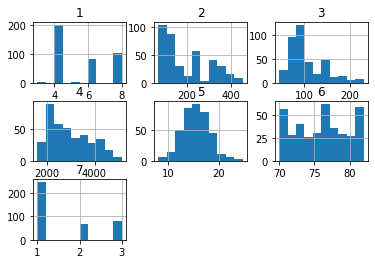

In [ ]:
#plt.figure(figsize=(20,20))
X_features.hist()

In [ ]:
#min max normalisation

# Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_features, y_target, test_size=0.2)

In [ ]:
X_features[2].shape

(392,)

# Univariate Linear Regreesion

In [ ]:
from sklearn.linear_model import LinearRegression
X = np.array(X_features[3]).reshape(-1,1)  # Only one indepedent variable
Y = y_target   
reg = LinearRegression()
reg.fit(X, Y)
print(reg.coef_)

[-0.15784473]


R^2 score:  0.6059482578894348


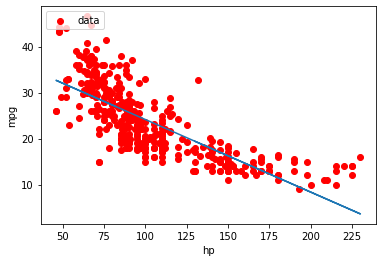

In [ ]:
print('R^2 score: ',reg.score(X, Y))
# Plot regression line and scatter
plt.scatter(x=X,y=Y,c='red', marker='o', label='data')
plt.plot(X,reg.predict(X))
plt.xlabel('hp')
plt.ylabel('mpg')
plt.legend(loc='upper left')
plt.show()

## Multivariate Linear Regression

In [ ]:
reg = LinearRegression()
reg.fit(X_train, Y_train)
predicted = reg.predict(X_test)
print(reg.coef_)
print(reg.intercept_)




[-0.88193479  0.02950194 -0.02346384 -0.00682647  0.02807097  0.73855528
  1.524015  ]
-13.576546904849017


R^2 score:  0.8261007805018693


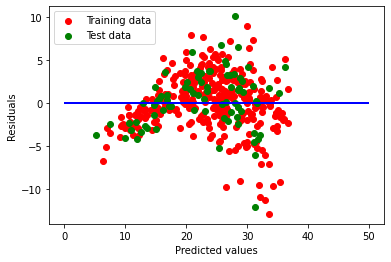

In [ ]:
print('R^2 score: ',reg.score(X_train, Y_train))
# Plot regression line and scatter
plt.scatter(x=reg.predict(X_train),y=reg.predict(X_train)-Y_train,c='red', marker='o', label='Training data')
plt.scatter(x=reg.predict(X_test),y=reg.predict(X_test)-Y_test,c='green', marker='o', label='Test data')
plt.hlines(y=0,xmin = 0, xmax = 50, lw=2, color='blue')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.show()